# 16 Very naive Approach to get the highest diversity in images

## 1. Load libraries

In [52]:
import os
from os import listdir
from os.path import isfile, join
import shutil
from PIL import Image

import torch
import torchvision.transforms.functional as TF

import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2 Load Images

In [2]:
imgFld = '../../cadastralExportRGB/cadastralRGB'

In [3]:
onlyfiles = [imgFld + '/' + f for f in listdir(imgFld) if isfile(join(imgFld, f))]
print(len(onlyfiles))

972


In [4]:
image = Image.open(onlyfiles[0])
imgs  = TF.to_tensor(image)
imgs.unsqueeze_(0)
print(imgs.shape)

torch.Size([1, 3, 1280, 1280])


In [5]:
for path in onlyfiles[1:100]:
    image = Image.open(path)
    new = TF.to_tensor(image)
    new.unsqueeze_(0)
    imgs = torch.cat((imgs, new), 0)

In [6]:
imgs.size()

torch.Size([100, 3, 1280, 1280])

## 3 Max n images for each channel

In [20]:
reds = []
greens = []
blues = []
for i in range(imgs.size(0)): 
    reds.append(float(imgs[i][0].sum()/(imgs.size(2)*imgs.size(3)))) # R
    greens.append(float(imgs[i][1].sum()/(imgs.size(2)*imgs.size(3)))) # G
    blues.append(float(imgs[i][2].sum()/(imgs.size(2)*imgs.size(3)))) # B

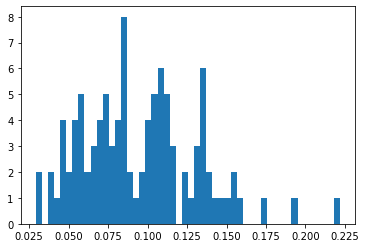

In [21]:
plt.hist(blues, bins=50);

In [24]:
minimgs, maximgs = 0, 100
reds = []
greens = []
blues = []

for ind in range(10):
    for path in onlyfiles[minimgs:maximgs]:
        imgs = torch.empty(0,3,1280, 1280)
        image = Image.open(path)
        new = TF.to_tensor(image)
        new.unsqueeze_(0)
        imgs = torch.cat((imgs, new), 0)

        for i in range(imgs.size(0)): 
            reds.append(float(imgs[i][0].sum()/(imgs.size(2)*imgs.size(3)))) # R
            greens.append(float(imgs[i][1].sum()/(imgs.size(2)*imgs.size(3)))) # G
            blues.append(float(imgs[i][2].sum()/(imgs.size(2)*imgs.size(3)))) # B

    minimgs += 100
    maximgs += 100
    maximgs = min(maximgs, len(onlyfiles))

In [26]:
N = 40

BestR = sorted(range(len(reds)), key = lambda sub: reds[sub])[-N:]
BestG = sorted(range(len(greens)), key = lambda sub: greens[sub])[-N:]
BestB = sorted(range(len(blues)), key = lambda sub: blues[sub])[-N:]

In [43]:
selected = [onlyfiles[i] for i in BestR]
selected.extend([onlyfiles[i] for i in BestG])
selected.extend([onlyfiles[i] for i in BestB])

In [48]:
selected = list(set(selected))

## 4 Copy file in new folder

In [50]:
dest = '../../cadastralExportRGBSelected/train/'

In [53]:
for file_name in selected:
    if os.path.isfile(file_name):
        shutil.copy(file_name, dest)